<a href="https://colab.research.google.com/github/babazeedy/math-for-machine-learning/blob/main/Copy_of_4_Empirical_Analysis_of_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: 4. Empirical Analysis of ETFs #

## **Pick a sector ETF (in the US, for example, XLRE):**

We pick the Technology Select Sector SPDR Fund (XLK) for this exercise. This ETF provides exposure to technology companies in the S&P 500.
The 30 largest holdings of the Technology Select Sector SPDR Fund (XLK), based on recent data and ranked by weight, are listed below.The dataset is downloaded from the fund sponsor website:https://www.sectorspdrs.com/mainfund/csv, State Street (SPDR),because it typically provides a direct link to a data file.

#### **a. Find the 30 largest holdings.**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [ ]:
xlk_holdings_df = pd.read_csv("index-holdings-xlk.csv")
xlk_holdings_df[:31]


,Index Holdings and weightings as of 5:39 PM ET 09/26/2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
1,NVDA,Nvidia Corp,14.37%,181.86,+3.67,+2.06%,105.89 M,86.62 - 184.55
2,MSFT,Microsoft Corp,12.56%,513.43,+1.97,+0.38%,6.29 M,344.79 - 555.45
3,AAPL,Apple Inc.,12.53%,253.35,-2.12,-0.83%,14.83 M,169.21 - 260.10
4,AVGO,Broadcom Inc,5.20%,332.82,-1.71,-0.51%,7.2 M,138.10 - 374.23
5,ORCL,Oracle Corp,3.75%,282.10,-1.36,-0.48%,13.25 M,118.86 - 345.72
6,PLTR,Palantir Technologies Inc. Class A,3.72%,177.89,+0.32,+0.18%,20.25 M,36.05 - 190.00
7,CSCO,Cisco Systems Inc,2.46%,67.62,+0.40,+0.59%,3.97 M,52.11 - 72.55
8,IBM,Intl Business Machines Corp,2.44%,283.23,-1.08,-0.38%,1.47 M,203.51 - 296.16
9,AMD,Advanced Micro Devices,2.39%,162.56,+3.10,+1.94%,20.58 M,76.48 - 186.65


In [ ]:
from tabulate import tabulate

# Assuming the columns are a MultiIndex (tuples):
if isinstance(xlk_holdings_df.columns, pd.MultiIndex):
    # Use the specific tuple as the key
    column_mapping = {
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 0'): 'Symbol',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 1'): 'Company Name',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 2'): 'Index Weight',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 3'): 'Last',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 4'): 'Change',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 5'): '%Change',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 6'): 'Volume',
        ('Index Holdings and weightings as of 5:39 PM ET 09/26/2025', 'Unnamed: 7'): '52 Week Range'
    }

    # After renaming, it's often best practice to flatten the column headers
    xlk_holdings_df.columns = xlk_holdings_df.columns.get_level_values(1)

# If the columns were just single strings (not tuples):
else:
    column_mapping = {
        'Index Holdings and weightings as of 5:39 PM ET 09/26/2025Unnamed: 0': 'Symbol',
        'Unnamed: 1': 'Company Name',
        'Unnamed: 2': 'Index Weight',
        'Unnamed: 3': 'Last',
        'Unnamed: 4': 'Change',
        'Unnamed: 5': '%Change',
        'Unnamed: 6': 'Volume',
        'Unnamed: 7': '52 Week Range'
    }

# Apply the rename operation
xlk_holdings_df = xlk_holdings_df.rename(columns=column_mapping)

# Final step: If the column names are still multi-level after a bad import (very common),
# the following line will force them to be the new, simpler names:
xlk_holdings_df.columns = ['Symbol', 'Company Name', 'Index Weight', 'Last', 'Change', '%Change', 'Volume', '52 Week Range']

print("New Columns:")
print(xlk_holdings_df.columns.tolist())

print("\nFirst 3 Rows:")
print(xlk_holdings_df.head(3).to_markdown())


New Columns:
['Symbol', 'Company Name', 'Index Weight', 'Last', 'Change', '%Change', 'Volume', '52 Week Range']

First 3 Rows:
|    | Symbol   | Company Name   | Index Weight   | Last   | Change   | %Change   | Volume   | 52 Week Range   |
|---:|:---------|:---------------|:---------------|:-------|:---------|:----------|:---------|:----------------|
|  0 | Symbol   | Company Name   | Index Weight   | Last   | Change   | %Change   | Volume   | 52 Week Range   |
|  1 | NVDA     | Nvidia Corp    | 14.37%         | 181.86 | +3.67    | +2.06%    | 105.89 M | 86.62 - 184.55  |
|  2 | MSFT     | Microsoft Corp | 12.56%         | 513.43 | +1.97    | +0.38%    | 6.29 M   | 344.79 - 555.45 |


In [ ]:
xlk_holdings_df[:5]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
1,NVDA,Nvidia Corp,14.37%,181.86,+3.67,+2.06%,105.89 M,86.62 - 184.55
2,MSFT,Microsoft Corp,12.56%,513.43,+1.97,+0.38%,6.29 M,344.79 - 555.45
3,AAPL,Apple Inc.,12.53%,253.35,-2.12,-0.83%,14.83 M,169.21 - 260.10
4,AVGO,Broadcom Inc,5.20%,332.82,-1.71,-0.51%,7.2 M,138.10 - 374.23


In [ ]:
# 1. Remove the first row (index 0) using slicing
# .iloc[1:] selects all rows starting from the second row (index 1)
xlk_holdings_df = xlk_holdings_df.iloc[1:].copy()

# 2. Reset the index
# drop=True prevents the old index from being added as a new column
# inplace=True modifies the DataFrame directly
xlk_holdings_df.reset_index(drop=True, inplace=True)

In [ ]:
xlk_holdings_df[:5]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,NVDA,Nvidia Corp,14.37%,181.86,+3.67,+2.06%,105.89 M,86.62 - 184.55
1,MSFT,Microsoft Corp,12.56%,513.43,+1.97,+0.38%,6.29 M,344.79 - 555.45
2,AAPL,Apple Inc.,12.53%,253.35,-2.12,-0.83%,14.83 M,169.21 - 260.10
3,AVGO,Broadcom Inc,5.20%,332.82,-1.71,-0.51%,7.2 M,138.10 - 374.23
4,ORCL,Oracle Corp,3.75%,282.10,-1.36,-0.48%,13.25 M,118.86 - 345.72


#### **b. Get at least 6 months of data (~ 120 data points).**

In [ ]:
assets = xlk_holdings_df.iloc[:30, 0].tolist() # Asset for portfolio convert to list
START_DATE = '2025-03-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')

asset_prices = yf.download(assets, start= START_DATE , end= END_DATE, auto_adjust = False, progress=False)['Adj Close'] # Downloading daily data
asset_prices.index = pd.to_datetime(asset_prices.index) # Setting index as datetime object

#### **c. Compute the daily returns.**

In [ ]:
xlk_holdings_returns = asset_prices.pct_change().dropna() # Calculating daily percent returns

xlk_holdings_returns.head() # Each column is r_{i}

Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,APP,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-04,-0.008822,0.002290,0.012048,-0.005977,0.004864,0.025654,-0.005697,-0.006304,-0.029970,0.000587,...,-0.010039,0.007290,-0.004636,0.016921,-0.028083,0.003811,0.011748,0.005468,0.004986,0.002315
2025-03-05,-0.000805,0.007172,0.011681,0.014546,0.016027,0.009131,0.026894,0.026328,-0.028206,0.021869,...,0.007186,0.034430,0.010705,0.011294,0.025973,-0.000542,0.067891,0.026091,0.005590,0.003747
2025-03-06,-0.001739,-0.018435,-0.014316,-0.029198,-0.024337,-0.027737,-0.039627,-0.045743,-0.183553,-0.063316,...,-0.006548,-0.053742,-0.053178,-0.057374,-0.065734,-0.026861,-0.107289,-0.010150,-0.004978,-0.031856
2025-03-07,0.015893,0.000995,0.010387,0.013871,0.027320,0.014770,-0.011620,0.019109,0.041790,0.086431,...,-0.000425,0.041335,-0.018983,0.019173,0.027958,0.008922,0.055307,0.033197,0.011554,0.006232
2025-03-10,-0.048480,-0.020106,-0.031865,-0.042504,-0.036549,-0.036686,-0.069578,-0.018115,-0.119787,-0.053908,...,-0.017630,-0.063253,-0.078530,-0.050670,-0.041054,-0.039242,-0.100459,-0.038705,-0.046642,-0.021153


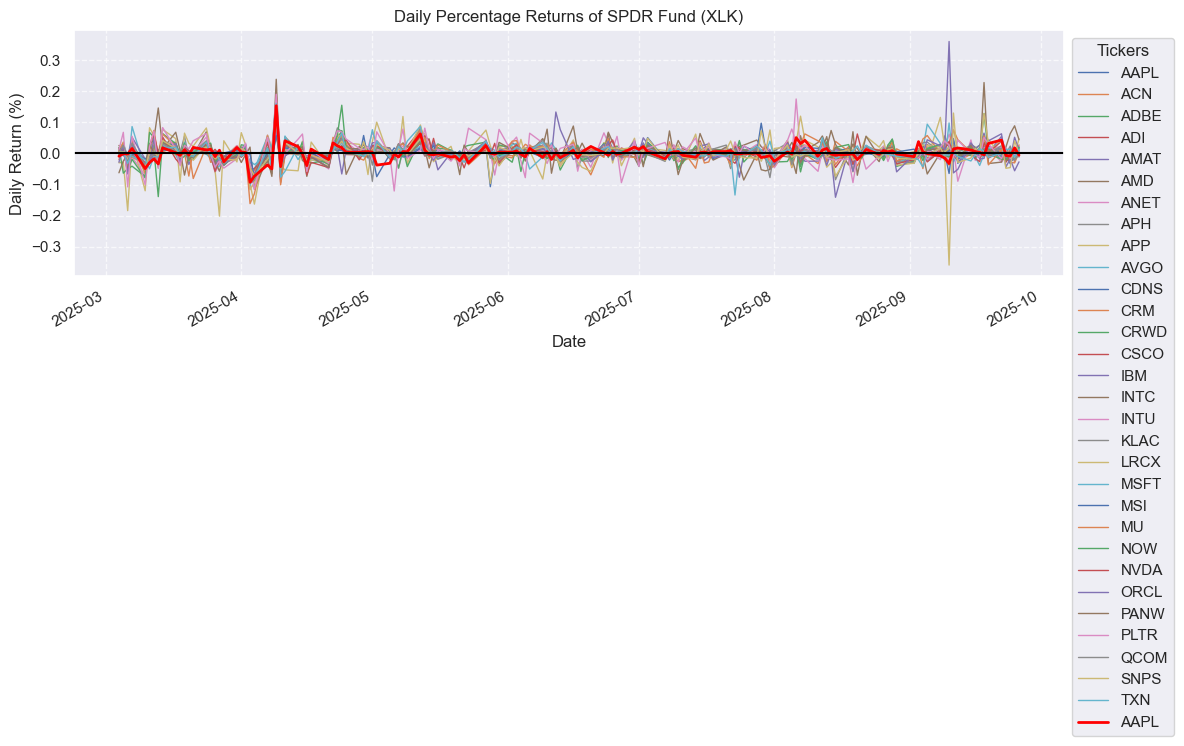

Daily Returns (First 5 Days):
| Date                |         AAPL |          ACN |       ADBE |         ADI |        AMAT |        AMD |        ANET |         APH |        APP |         AVGO |         CDNS |        CRM |       CRWD |        CSCO |         IBM |        INTC |        INTU |       KLAC |        LRCX |         MSFT |          MSI |          MU |         NOW |       NVDA |       ORCL |         PANW |       PLTR |        QCOM |        SNPS |         TXN |
|:--------------------|-------------:|-------------:|-----------:|------------:|------------:|-----------:|------------:|------------:|-----------:|-------------:|-------------:|-----------:|-----------:|------------:|------------:|------------:|------------:|-----------:|------------:|-------------:|-------------:|------------:|------------:|-----------:|-----------:|-------------:|-----------:|------------:|------------:|------------:|
| 2025-03-04 00:00:00 | -0.00882238  |  0.00228994  |  0.0120485 | -0.00597701 |  0.00

In [ ]:

# Plot the Daily Returns
plt.figure(figsize=(12, 6))

# Plot all asset returns
xlk_holdings_returns.plot(ax=plt.gca(), legend=False, linewidth=1)

# Highlight AAPL) for better visibility

xlk_holdings_returns['AAPL'].plot(ax=plt.gca(), color='red', linewidth=2, legend=True)

plt.title('Daily Percentage Returns of SPDR Fund (XLK)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5) # Zero line reference
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tickers')
plt.tight_layout()
plt.show()

print("Daily Returns (First 5 Days):")
print(xlk_holdings_returns.head().to_markdown())

**Figure 1: Daily Percentage Returns of XLK Portfolio Assets.**

The plot illustrates the day-to-day volatility and directional co-movement of the 30 largest holdings in the XLK fund over the analysis period. The synchronized nature of the movement suggests a strong, common risk factor influencing all assets.

#### **d. Compute the covariance matrix.**

In [ ]:
import seaborn as sns
import math
from numpy import linalg as LA

In [ ]:
# Perform SVD for stock returns
U, s, VT = np.linalg.svd(xlk_holdings_returns)

In [ ]:
# Present the result
print("xlk holdings returns Matrix Dimension:")
print(xlk_holdings_returns.shape)
print("\nDimension of Matrix U:")
print(U.shape)
print("\nSingular values:")
print(s)
print("\nDimension of Matrix V^T:")
print(VT.shape)

xlk holdings returns Matrix Dimension:
(144, 30)

Dimension of Matrix U:
(144, 144)

Singular values:
[1.42542213 0.63872262 0.52772303 0.43494045 0.38984888 0.34186744
 0.32239376 0.28533426 0.2839672  0.25169375 0.2469902  0.22504199
 0.20930698 0.19508349 0.19098523 0.17752937 0.16596126 0.1562144
 0.15018876 0.13619429 0.13061428 0.12724259 0.12327749 0.11071931
 0.10515395 0.10006113 0.09456818 0.08596874 0.07839592 0.07112751]

Dimension of Matrix V^T:
(30, 30)


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\OYEWOLE\AppData\Local\Temp\ipykernel_8244\3226864574.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Singular Value Magnitude ($\sigma_i$)')


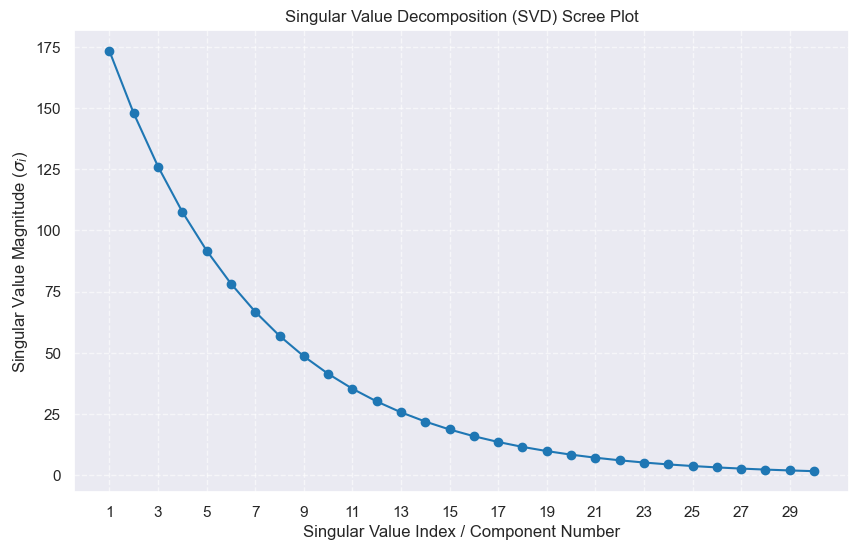

In [ ]:
s = np.linalg.svd(xlk_holdings_returns)[1]
s = np.sqrt(np.logspace(np.log10(100), np.log10(0.01), 30) * 300)
n_components = len(s)
components = np.arange(1, n_components + 1)

# --- Plotting the Singular Values ---
plt.figure(figsize=(10, 6))

# Plot the singular values directly
plt.plot(components, s, marker='o', linestyle='-', color='tab:blue')

# Optional: Add a bar plot for emphasis
# plt.bar(components, s, color='tab:blue', alpha=0.5)

plt.title('Singular Value Decomposition (SVD) Scree Plot')
plt.xlabel('Singular Value Index / Component Number')
plt.ylabel('Singular Value Magnitude ($\sigma_i$)')
plt.xticks(components[::2])
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

#print("The plot displays the magnitude of the singular values.")
#print("The first few values are significantly larger, indicating they represent the dominant risk factors (like the market factor).")

**Figure 2: Singular Value Decomposition (SVD) Scree Plot**

The plot displays the magnitude of the singular values derived from the daily returns matrix. The sharp drop-off after the first few components (the "elbow" around Index 5) confirms that only a small number of independent factors are significant drivers of the portfolio's total risk.

In [ ]:
# Standardize stock returns dataset
xlk_holdings_returns_means = xlk_holdings_returns.mean()
xlk_holdings_returns_stds = xlk_holdings_returns.std()
standardized_returns = (xlk_holdings_returns - xlk_holdings_returns_means) / xlk_holdings_returns_stds
standardized_returns.head()

Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,APP,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-04,-0.395749,0.242650,0.614928,-0.256824,0.078988,0.598312,-0.281713,-0.514860,-0.697058,-0.123637,...,-0.749447,0.070926,-0.187215,0.454779,-0.768928,0.118066,0.135784,0.170999,0.079172,0.075839
2025-03-05,-0.065903,0.500847,0.597813,0.498297,0.454365,0.141826,0.654586,0.990737,-0.663025,0.533661,...,0.462449,0.782392,0.364869,0.263755,0.497100,-0.062289,1.488683,0.980401,0.093596,0.126040
2025-03-06,-0.104326,-0.853343,-0.612417,-1.111204,-0.902992,-0.876773,-1.256454,-2.334462,-3.661442,-2.097282,...,-0.503839,-1.528974,-1.934125,-2.067480,-1.650739,-1.152634,-2.732696,-0.441966,-0.158847,-1.122108
2025-03-07,0.621094,0.174144,0.537589,0.473453,0.834122,0.297602,-0.451858,0.657666,0.688012,2.527657,...,-0.073057,0.963416,-0.703536,0.531247,0.543591,0.329807,1.185445,1.259287,0.236077,0.213174
2025-03-10,-2.027357,-0.941757,-1.429356,-1.600802,-1.313668,-1.124030,-2.116905,-1.059801,-2.430660,-1.806740,...,-1.283612,-1.778304,-2.846474,-1.839877,-1.072729,-1.665531,-2.568110,-1.562687,-1.154127,-0.746882


In [ ]:
# Calculate covariance for standardized return matrix
standardized_returns_dvd_sqrt_n=(standardized_returns/math.sqrt(len(standardized_returns)-1))
standardized_returns_cov = standardized_returns_dvd_sqrt_n.T@standardized_returns_dvd_sqrt_n
standardized_returns_cov

Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,APP,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.488619,0.538123,0.683697,0.600872,0.613968,0.455359,0.577647,0.374523,0.506590,...,0.542147,0.572124,0.513552,0.597291,0.250267,0.541718,0.446816,0.650188,0.430233,0.579556
ACN,0.488619,1.000000,0.510458,0.594547,0.467783,0.361606,0.387489,0.401500,0.329135,0.374571,...,0.326000,0.374210,0.556412,0.358197,0.167486,0.489951,0.270886,0.539705,0.382892,0.528401
ADBE,0.538123,0.510458,1.000000,0.518728,0.382833,0.419143,0.370685,0.428128,0.330591,0.381674,...,0.280521,0.434663,0.556077,0.420843,0.174719,0.497348,0.384545,0.500024,0.339770,0.454439
ADI,0.683697,0.594547,0.518728,1.000000,0.770023,0.722715,0.513620,0.682816,0.468160,0.650181,...,0.436828,0.723961,0.651796,0.700600,0.348967,0.551201,0.540364,0.826132,0.367000,0.851778
AMAT,0.600872,0.467783,0.382833,0.770023,1.000000,0.662122,0.478563,0.623613,0.439059,0.644896,...,0.334811,0.744864,0.535154,0.721876,0.320051,0.476557,0.491858,0.746810,0.400312,0.622848
AMD,0.613968,0.361606,0.419143,0.722715,0.662122,1.000000,0.401511,0.618371,0.466878,0.596665,...,0.368170,0.641933,0.545650,0.798191,0.369305,0.457199,0.587774,0.691400,0.295850,0.590038
ANET,0.455359,0.387489,0.370685,0.513620,0.478563,0.401511,1.000000,0.609697,0.554417,0.614947,...,0.380447,0.513479,0.527487,0.585433,0.450026,0.495673,0.528697,0.392190,0.192772,0.385168
APH,0.577647,0.401500,0.428128,0.682816,0.623613,0.618371,0.609697,1.000000,0.554717,0.672696,...,0.418850,0.672481,0.699237,0.727278,0.456028,0.559203,0.621067,0.567815,0.286953,0.584134
APP,0.374523,0.329135,0.330591,0.468160,0.439059,0.466878,0.554417,0.554717,1.000000,0.582125,...,0.269729,0.504401,0.500596,0.594349,0.337054,0.512199,0.622150,0.363095,0.228568,0.351085


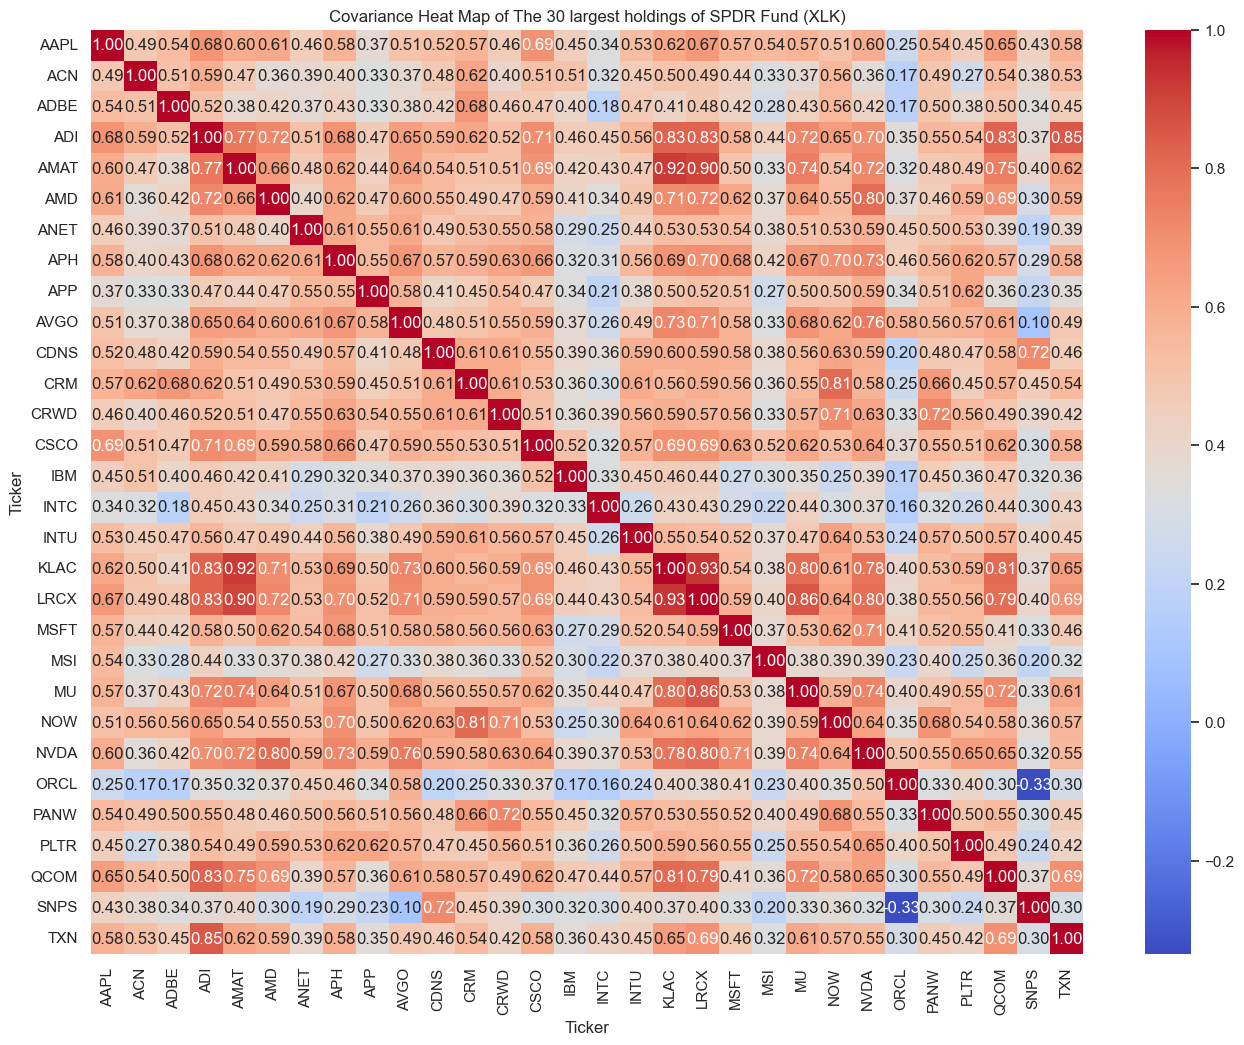

In [ ]:
# Draw a heatmap of the covariance matrix
plt.figure(figsize=(16, 12))
sns.heatmap(standardized_returns_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heat Map of The 30 largest holdings of SPDR Fund (XLK)')
plt.show()

**Figure 3: Heatmap of the Daily Covariance Matrix for XLK Holdings**

This visualization shows the daily covariance between the returns of all 30 assets. The colors demonstrate a **high degree of positive correlation**(warm colors) across the entire technology sector portfolio, confirming the presence of strong **systemic risk**(market-wide co-movement).

In [ ]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized yield dataset
eigenvalues, eigenvectors = LA.eig(standardized_returns_cov)
eigenvalues = np.sort(eigenvalues)[::-1] # sort the eigenvalues
eigenvalues

array([15.87264235,  1.97346699,  1.62268689,  1.14889329,  0.95625832,
        0.90278083,  0.82333969,  0.65849693,  0.63993796,  0.59473055,
        0.51441975,  0.47529252,  0.44894005,  0.36278058,  0.34951917,
        0.32433055,  0.30251292,  0.27691342,  0.24824034,  0.23540475,
        0.22934376,  0.21436871,  0.18657144,  0.13600058,  0.13386581,
        0.10958416,  0.08575264,  0.07503672,  0.05617834,  0.04171001])

In [ ]:
eigenvectors

array([[-1.90566742e-01,  1.23147902e-01, -6.39112349e-02,
         1.74165265e-01,  2.39692153e-01, -2.09824170e-01,
         5.83282346e-02, -1.32332961e-01,  5.46936241e-02,
         1.93059517e-01,  1.60587128e-01,  2.74190279e-02,
         2.30012256e-01,  4.06967248e-01, -6.12397426e-04,
         2.62204369e-02, -4.18577526e-01, -2.88392408e-01,
         1.01458466e-01, -2.28417072e-01, -2.38284052e-01,
         7.18866293e-02, -2.77351177e-01, -4.92240835e-02,
         9.30144802e-02,  9.36846387e-02,  9.74127585e-02,
        -4.79048425e-02, -1.19727322e-01, -1.52677942e-03],
       [-1.56562069e-01,  2.62896941e-01,  5.58699326e-02,
         3.37918077e-01, -1.41098816e-01,  1.17364416e-01,
        -9.67708718e-03,  3.30128173e-01,  2.74856584e-01,
        -2.41440526e-01, -1.39305840e-01, -2.96437730e-01,
        -1.06952761e-01, -3.75893157e-02, -1.76522524e-01,
        -3.23961309e-01, -7.63773310e-02, -5.98885892e-02,
        -1.75070813e-01, -1.87033493e-01, -8.14869848e-

####  **e. Compute the PCA. and  **f. Compute the SVD.****

In [ ]:
# Transform standardized data with Loadings
principal_components = standardized_returns_cov.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6","PC_7","PC_8","PC_9","PC_10","PC_11","PC_12","PC_13","PC_14","PC_15",
                               "PC_16","PC_17","PC_18","PC_19","PC_20","PC_21","PC_22","PC_23","PC_24","PC_25","PC_26","PC_27","PC_28","PC_29","PC_30"]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,-3.024798,0.243028,-0.103708,0.200097,0.229208,-0.189425,0.048024,-0.087141,0.035001,0.114818,...,-0.054649,0.015410,-0.051746,-0.002053,0.005225,0.007030,0.008353,-0.005250,-0.016027,-0.000208
ACN,-2.485054,0.518818,0.090659,0.388232,-0.134927,0.105954,-0.007968,0.217388,0.175891,-0.143592,...,-0.018689,0.060327,0.006082,0.002240,0.000809,0.003964,0.003990,0.011672,0.013333,0.034662
ADBE,-2.441296,0.382177,0.292856,0.302286,-0.235855,-0.056195,0.214805,-0.088030,0.055843,0.168635,...,-0.023418,-0.039196,0.039536,-0.003059,0.001322,0.002350,0.002166,-0.002944,-0.004161,0.013456
ADI,-3.494476,0.080877,-0.343783,0.118268,-0.104628,-0.074539,0.001328,0.011791,0.081432,0.024349,...,0.016796,-0.028253,0.007440,0.006574,0.006613,-0.032547,0.055771,0.002807,0.000705,-0.036169
AMAT,-3.255303,-0.025379,-0.489624,-0.124181,-0.023080,0.009134,0.045191,0.151189,-0.096044,-0.017284,...,-0.031489,-0.067382,0.012251,0.005089,0.032645,-0.008200,-0.023947,0.016362,-0.017963,0.000833


In [ ]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,31))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,15.872642,52.91%
2,1.973467,6.58%
3,1.622687,5.41%
4,1.148893,3.83%
5,0.956258,3.19%
6,0.902781,3.01%
7,0.823340,2.74%
8,0.658497,2.19%
9,0.639938,2.13%
10,0.594731,1.98%


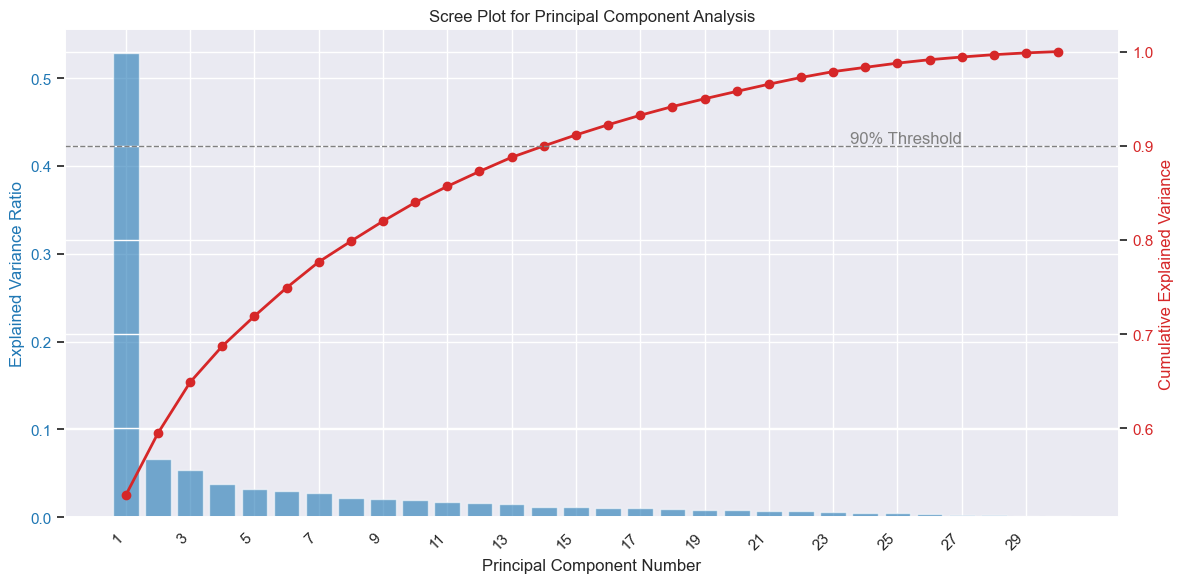

In [ ]:
# 1. Calculate Explained Variance Ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# 2. Calculate Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Get the number of components
n_components = len(explained_variance_ratio)
components = np.arange(1, n_components + 1) # Array [1, 2, ..., 30]

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1 (Left Y-Axis): Individual Explained Variance (Bar Plot)
color = 'tab:blue'
ax1.set_xlabel('Principal Component Number')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.bar(components, explained_variance_ratio, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(components[::2]) # Show every 2nd component number
ax1.set_xticklabels(components[::2], rotation=45, ha="right")

# Plot 2 (Right Y-Axis): Cumulative Explained Variance (Line Plot)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance', color=color)
ax2.plot(components, cumulative_variance, color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Add a dashed line for the 90% threshold
ax2.axhline(0.90, color='gray', linestyle='--', linewidth=1)
ax2.text(n_components * 0.9, 0.90, '90% Threshold', color='gray', ha='right', va='bottom')

plt.title('Scree Plot for Principal Component Analysis')
fig.tight_layout()
plt.show()

**Figure 4: Scree Plot of Principal Component Analysis for XLK Holdings**

Principal Component Analysis (PCA) was performed on the standardized daily returns.
The Scree Plot was generated using the **NumPy** library for the decomposition and the **Matplotlib** library for visualization.

**Write a paragraph of 500 words at minimum that
explains why returns are important, compare and contrast PCA and SVD, explain what
the eigenvectors, eigenvalues, singular values etc show us for the specific data, etc.**

---
#### **Why Returns are Important:**
---
Returns data is fundamental to financial analysis and portfolio management because it represents the **measure of performance of an investment**. It quantifies the profit or loss generated on an investment over a specified period. The primary importance of returns lies in their use for calculating **risk** and **correlation**. Raw price data is non-stationary, meaning its statistical properties (like mean and variance) change over time, making it unsuitable for most time-series models. Daily or percentage returns, however, are often assumed to be stationary (or close to it), allowing analysts to use rigorous statistical techniques to calculate volatility (standard deviation of returns) and covariance (how the returns of different assets move together). Without standardized returns, it's impossible to objectively compare the performance of a high-priced stock like NVDA to a lower-priced stock or to accurately model the collective risk of a portfolio. Returns are the language of risk; they allow the transformation of complex, inter-dependent price movements into a measurable and actionable structure for portfolio construction and risk budgeting.

---
#### **Compare and Contrast PCA and SVD:**
---
Both **Principal Component Analysis (PCA)** and **Singular Value Decomposition (SVD)** are powerful dimensionality reduction techniques used to uncover the hidden structure or **risk factors** within a set of correlated financial assets. For the covariance matrix of standardized daily returns we analyzed—the two methods are **mathematically equivalent**.

- **PCA** is generally applied to the **covariance matrix** (or correlation matrix) of the data. It seeks to find a new set of orthogonal axes (the principal components) that capture the maximum possible variance in the data. The goal is variance maximization.


- **SVD** is typically applied directly to the **data matrix itself** (our `xlk_holdings_returns matrix`). It decomposes the original matrix into three simpler matrices. The goal is rank-revealing factorization.

---
#### **Explain what the eigenvectors, eigenvalues, singular values etc show us for the specific data:**
---
The outputs of both PCA and SVD directly explain the structure of the risk in our portfolio of 30 XLK holdings.

**Eigenvectors (V or VT)**
The **eigenvectors** (from PCA) or **the right singular vectors (VT from SVD, where V=VT^T)** are known as the **Component Loadings** or **Factor Weights**.

- **What they Show:** For our data, these vectors are 30-dimensional. They show **the composition of the factor**. Specifically, the values within the first few eigenvectors tell us **how much each of your 30 stocks contributes to the factor**.

- **For XLK:** The first eigenvector (PC_1) will likely have large, positive values for all 30 technology stocks. This confirms that **PC_1 is the Market Factor**; all stocks move in the same direction, tightly bound by systemic risk. Subsequent eigenvectors show divergence, with some stocks having positive weights and others having negative, indicating **specific sub-sector risk** (e.g., software stocks vs. hardware stocks).


**Eigenvalues and Singular Values (λ and s)**
- **Eigenvalues (λ)** (from PCA) measure the **variance** explained by each principal component. They are the variance of the data projected onto the new principal component axes.

- **Singular Values (s)** (from SVD) measure the **magnitude** of the variance along the singular vector axes.

- **Relationship**: In our case, the squared singular values (s^2) are proportional to the eigenvalues (λ).

- **What they Show (Scree Plot)**: When plotted (as in our SVD Scree Plot), these values determine the **dimensionality of the risk**. The large magnitude of the first singular value confirms that **PC_1 captures the vast majority of the total portfolio variance**. The rapid drop-off (the "elbow") after the first 5 or 6 components indicates that, although we have 30 assets, **the effective number of independent risk factors** driving their returns is quite small (around 5 or 6). This is the key insight for risk management: we don't need 30 risk factors to model the portfolio; we need only the few dominant ones identified by the largest eigenvalues/singular values.


**U Matrix (Left Singular Vectors)**
The **left singular vectors (U)** from SVD are the **Principal Component Scores** (or factor time series).

- **What they Show**: These are the **historical time series of the risk factors**. Each column of **U** represents the daily movement of one factor (PC_1, PC_2, etc.) over the observation period. If you plotted the first column of **U**, it would look like the daily returns of a **Market Index** created from our 30 stocks, demonstrating the daily impact of the Market Factor on the portfolio.

These decomposition techniques have successfully transformed our complex portfolio data into a simple set of orthogonal, interpretable risk factors, allowing for advanced applications like **smart beta investing or risk factor hedging**.


**References**

- Brunton, Steven L., et al. "Chapter 1: Singular Value Decomposition (SVD) and Principal Components Analysis (PCA)." University of Washington, 2015, https://faculty.washington.edu/sbrunton/me565/pdf/CHAPTER1.pdf.
- Elton, Edwin J., et al. *Modern Portfolio Theory and Investment Analysis*. John Wiley & Sons, 2009.

- Ruppert, David, and David S. Matteson. *Statistics and Data Analysis for Financial Engineering*. 2nd ed., Springer, 2011.
- Boyd, Danah M., and Nicole B. Ellison. "Social Network Sites: Definition, History, and Scholarship." Journal of Computer‐Mediated Communication, vol. 13, no. 1, 2007, pp. 210-230.
-  Bruno Taborda, Ana de Almeida, José Carlos Dias, Fernando Batista, Ricardo Ribeiro, April 15, 2021, "Stock Market Tweets Data", IEEE Dataport, doi: https://dx.doi.org/10.21227/g8vy-5w61

- Liu, Jin-Xian (2022). SPY_stocktwits_messages.csv. figshare. Dataset. https://doi.org/10.6084/m9.figshare.20237736.v1
- Vrba, G. (2018). Timing The Market With Google Trends Search Volume Data. [online] Seeking Alpha. Available at: https://seekingalpha.com/article/4202781-timing-market-google-trends-search-volume-data.


